In [1]:
import tensorflow as tf
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
import shutil

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)
gpus

[]

In [ ]:
# os.rmdir('data/.ipynb_checkpoints')
# shutil.rmtree('data/eyes_open')

In [4]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 84898 files belonging to 2 classes.


In [5]:
data_iterator = data.as_numpy_iterator()

In [6]:
# get another batch from iterator
batch = data_iterator.next()

In [7]:
scaled = batch[0] / 255

In [8]:
data = data.map(lambda x, y: (x/255, y))

In [9]:
scaled_iterator = data.as_numpy_iterator()

In [12]:
batch = scaled_iterator.next()

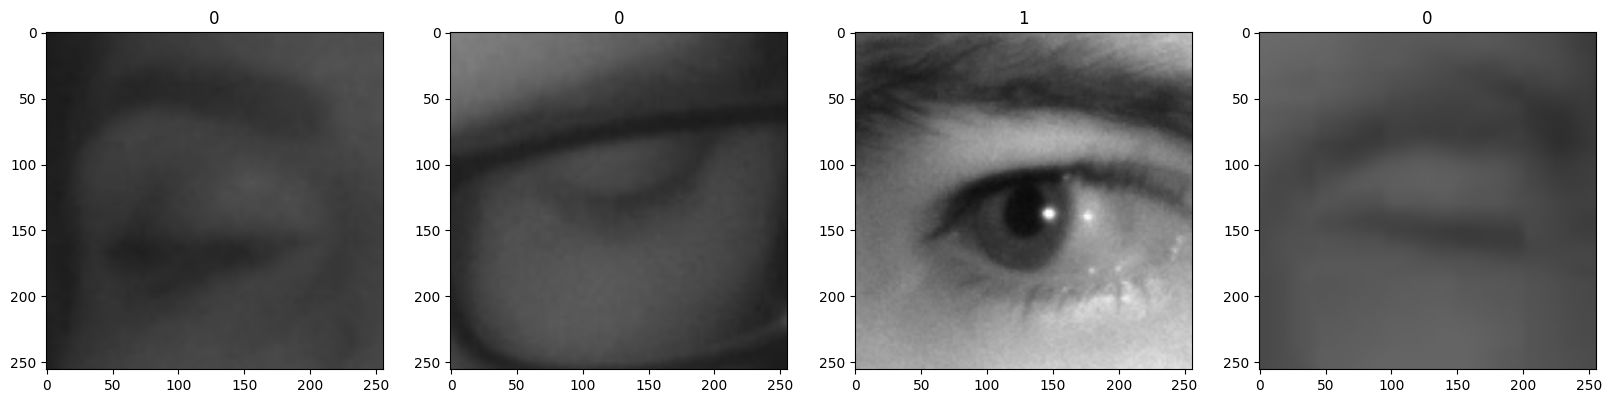

In [13]:
# 0 eyes closed, 1 eyes open
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [16]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

In [21]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [22]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
1857/1857 [==============================] - 1188s 639ms/step - loss: 0.2172 - accuracy: 0.9147 - val_loss: 0.1360 - val_accuracy: 0.9508
Epoch 2/20
1857/1857 [==============================] - 1027s 553ms/step - loss: 0.1168 - accuracy: 0.9576 - val_loss: 0.0964 - val_accuracy: 0.9659
Epoch 3/20
1857/1857 [==============================] - 1018s 548ms/step - loss: 0.0882 - accuracy: 0.9688 - val_loss: 0.0897 - val_accuracy: 0.9691
Epoch 4/20
1857/1857 [==============================] - 1019s 549ms/step - loss: 0.0679 - accuracy: 0.9752 - val_loss: 0.0813 - val_accuracy: 0.9717
Epoch 5/20
1857/1857 [==============================] - 1019s 548ms/step - loss: 0.0570 - accuracy: 0.9798 - val_loss: 0.0664 - val_accuracy: 0.9773
Epoch 6/20
1857/1857 [==============================] - 1023s 551ms/step - loss: 0.0483 - accuracy: 0.9828 - val_loss: 0.0612 - val_accuracy: 0.9803
Epoch 7/20
1857/1857 [==============================] - 1021s 550ms/step - loss: 0.0415 - accuracy: 0.9850

In [23]:
# save the model

model.save('models/CNN-163216-80k.h5')

In [24]:
history.history

{'loss': [0.21722233295440674,
  0.11680162698030472,
  0.08824315667152405,
  0.06789761036634445,
  0.05700782686471939,
  0.048293136060237885,
  0.041547637432813644,
  0.03688439354300499,
  0.031055336818099022,
  0.030008306726813316,
  0.025523345917463303,
  0.023371677845716476,
  0.02226248010993004,
  0.01884601078927517,
  0.017224356532096863,
  0.01591336354613304,
  0.014917435124516487,
  0.013620350509881973,
  0.012304863892495632,
  0.011745109222829342],
 'accuracy': [0.9147145748138428,
  0.9576097130775452,
  0.9687668085098267,
  0.9751783609390259,
  0.9797556400299072,
  0.9828352332115173,
  0.9850060343742371,
  0.9870591163635254,
  0.9888933897018433,
  0.9893308877944946,
  0.9909968972206116,
  0.9918046593666077,
  0.9926797151565552,
  0.9940764904022217,
  0.9939250349998474,
  0.9944130182266235,
  0.9948673844337463,
  0.9953217506408691,
  0.9958938956260681,
  0.9962472915649414],
 'val_loss': [0.13602739572525024,
  0.09643968939781189,
  0.08968

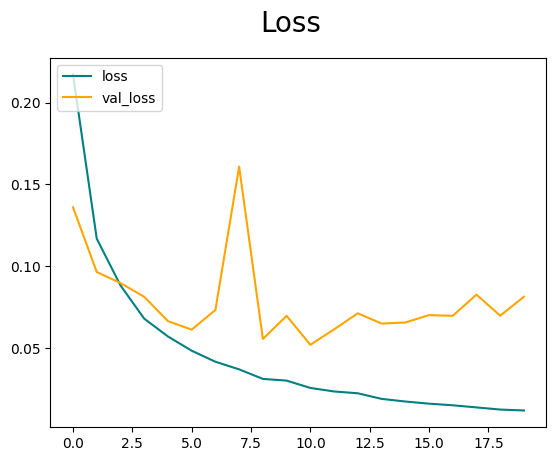

In [25]:
# Plot the performance
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

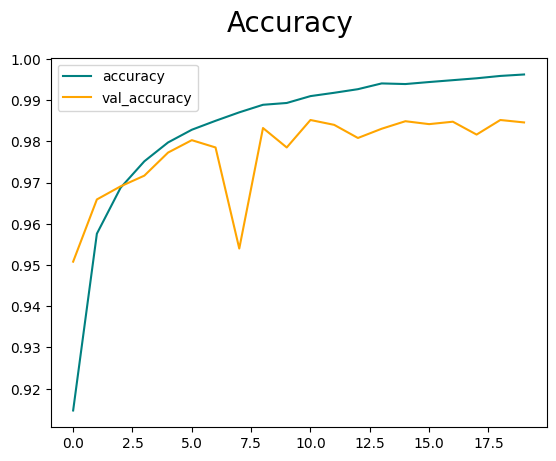

In [26]:

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

<AxesSubplot:>

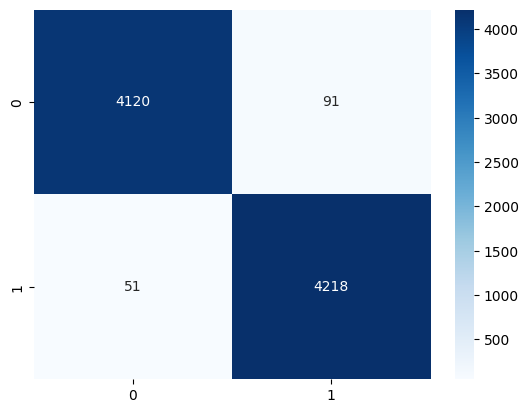

In [27]:
# draw confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = []
y_pred = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    y_true.extend(y)
    y_pred.extend(yhat)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

y_pred = np.where(y_pred > .5, 1, 0)

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# 0 is eyes closed, 1 is eyes open

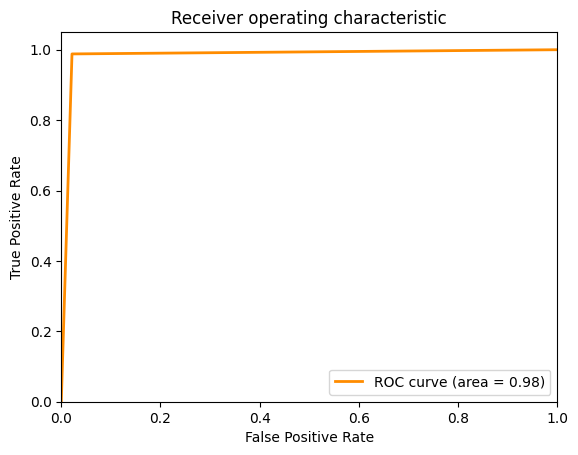

In [28]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [29]:
from tensorflow.python.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
prec = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  prec.update_state(y, yhat)
  recall.update_state(y, yhat)
  accuracy.update_state(y, yhat)


In [32]:
print(prec.result().numpy(), recall.result().numpy(), accuracy.result().numpy())

0.9789157 0.9883041 0.9833726


In [6]:
model = tf.keras.models.load_model('models/CNN-163216-80k.h5')

In [ ]:
img = cv2.imread('data-trimmed/eyes_open2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [12]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 155ms/step


In [15]:
yhat[0][0] 

0.999709

In [14]:
if yhat > 0.5:
  print('Predicted class is Eyes Open')
else:
  print('Predicted class is Eyes Closed')

Predicted class is Eyes Open
